In [1]:
import numpy as np
import math
def f(x):
    
    return x**3
#times为采样次数
#bound为上下边界矩阵
def calro(times,a,b):
    #此为最简形式，基于正态分布于区间[a,b]内随机采数
    #后续添加基于样本，推测函数分布密度，决定该次采样是否接受，马尔卡尔蒙特卡洛方法
    x = []
    y = []
    for i in range(times):
        tp = np.random.rand()*(b-a)
        x.append(tp)
    x = np.sort(x)
    y = f(x)
    return np.array(x),np.array(y)


In [2]:
import matplotlib.pyplot as plt
SMALL_SIZE = 11
MEDIUM_SIZE = 13
BIGGER_SIZE = 13
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [3]:
times = 1000000
x_cal,y_cal = calro(times,0,1)
def plot_compare(times,x_cal,y_cal):
    #采样点是否合理直接决定估值精度
    x_real = np.linspace(0,1,times)
    y_real = f(x_real)
    plt.figure()
    gca = 'get_current_axis'
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.plot(x_real,y_real,color='yellow',linestyle='-')
    #print(x_cal)
    plt.plot(x_cal,y_cal,color='blue',marker='o')
    plt.legend(['sin(x)','采样值'])
    plt.show()

C:\Users\MSI-PC\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


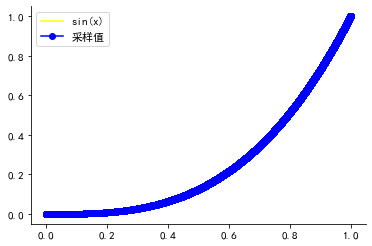

In [4]:
plot_compare(times,x_cal,y_cal)

In [5]:
def cal_s(y_cal,times):
    return sum(y_cal)/times
print('当采样次数为: '+str(times)+',x.^3在[0,1]估计面积值为: ',cal_s(y_cal,times))

当采样次数为: 1000000,x.^3在[0,1]估计面积值为:  0.2503139468139019
